# **Proyecto Semestral**

## **Entrega 2: Extracción y exploración de datos**

### 1) Carga del Dataset

*Importacion de bibliotecas:*

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Lectura de la base de datos:*

In [39]:
df_enusc = pd.read_csv("../data/base-usuario-20-enusc-2023.csv")

### 2) Vista general del Dataset

*Numero de filas y columnas (registros y variables) del Dataset:*

In [40]:
df_enusc.shape 

(146294, 1301)

*Resumen general del Dataset:*

In [41]:
df_enusc.info

<bound method DataFrame.info of                rph_ID         idhogar  enc_idr  enc_region  enc_rpc  com102  \
0       00-00-33-94_1  00-00-33-94-H1     7479          10    10101       1   
1       00-00-33-94_2  00-00-33-94-H1     7479          10    10101       1   
2       00-00-33-94_3  00-00-33-94-H1     7479          10    10101       1   
3       00-00-33-94_4  00-00-33-94-H1     7479          10    10101       1   
4       00-00-41-76_1  00-00-41-76-H1    46130          10    10202       1   
...               ...             ...      ...         ...      ...     ...   
146289  99-99-38-43_3  99-99-38-43-H1    39665           8     8201       0   
146290  99-99-38-43_4  99-99-38-43-H1    39665           8     8201       0   
146291  99-99-88-78_1  99-99-88-78-H1    20879           5     5109       1   
146292  99-99-88-78_2  99-99-88-78-H1    20879           5     5109       1   
146293  99-99-88-78_3  99-99-88-78-H1    20879           5     5109       1   

        IH_residenc

*Muestra de las primeras 5 columnas:*

In [42]:
df_enusc.head(5)

,rph_ID,idhogar,enc_idr,enc_region,enc_rpc,com102,IH_residencia_habitual,IH_comparte_gastos,IH_numero_grupos,IH_cantidad_hogar,...,EXT_LOCAL,SOB_LOCAL,Fact_Pers_Com,Fact_Pers_Reg,Fact_Pers_Regional_102,Fact_Hog_Com,Fact_Hog_Reg,Fact_Hog_Regional_102,VarStrat,Conglomerado
0,00-00-33-94_1,00-00-33-94-H1,7479,10,10101,1,4,1.0,NaN,1,...,0.0,0.0,425.245263,519.894835,591.228012,155.960818,192.60032,221.462682,20240101.0,2.023004e+09
1,00-00-33-94_2,00-00-33-94-H1,7479,10,10101,1,4,1.0,NaN,1,...,NaN,NaN,NaN,NaN,591.228012,NaN,NaN,221.462682,NaN,NaN
2,00-00-33-94_3,00-00-33-94-H1,7479,10,10101,1,4,1.0,NaN,1,...,NaN,NaN,NaN,NaN,591.228012,NaN,NaN,221.462682,NaN,NaN
3,00-00-33-94_4,00-00-33-94-H1,7479,10,10101,1,4,1.0,NaN,1,...,NaN,NaN,NaN,NaN,591.228012,NaN,NaN,221.462682,NaN,NaN
4,00-00-41-76_1,00-00-41-76-H1,46130,10,10202,1,4,1.0,NaN,1,...,NaN,NaN,NaN,NaN,222.646726,NaN,NaN,64.841374,NaN,NaN


### 3) Analisis general de variables

* Tipo de datos de las variables del Dataset:*

In [43]:
df_enusc.dtypes

rph_ID                    object
idhogar                   object
enc_idr                    int64
enc_region                 int64
enc_rpc                    int64
                          ...   
Fact_Hog_Com             float64
Fact_Hog_Reg             float64
Fact_Hog_Regional_102    float64
VarStrat                 float64
Conglomerado             float64
Length: 1301, dtype: object

*Frecuencia de los tipo de datos:*

In [44]:
df_enusc.dtypes.value_counts()

float64    1286
int64        13
object        2
Name: count, dtype: int64

*Muestra de la frecuencia de los valores de las variables:*

In [45]:
cant_nulos_variables=df_enusc.isna().mean().sort_values(ascending=False)
cant_nulos_variables.head(1000) 

EST_QUIEN__3             0.999993
RPS_QUIEN__3             0.999993
AGR_QUIEN__3             0.999993
AGR_QUIEN__4             0.999993
SOB_DONDE_REGION         0.999993
                           ...   
RDDV_MED_SEGURIDAD__7    0.976123
RDDV_DONDE_OCURRIO       0.976123
RDDV_DENUNCIAS           0.976123
RDDV_MED_SEGURIDAD__2    0.976123
RDDV_REGION              0.976123
Length: 1000, dtype: float64

Podemos ver que una gran cantidad de variables, en este 1000 variables del total 1301 variables, tienen una frecuencia de datos nulos sobre el 97%, esto es debido a que muchas de las preguntas estan condicionadas a respuestas anteriores, por ejemplo,  si la persona "fue victima de un delito especifico", "realizo una denuncia", etc.



### 4) Analisis Exploratorio de los datos:

Creación de la funcion grafico de barras que se usara en esta entrega:

In [46]:
def bar_plot(data, labels, title, xlabel, ylabel, color='skyblue', width=0.4):
    """
    Crea un grafico de barras.

    Args:
        data: Lista o array con los valores de las barras.
        labels: Lista o array con las etiquetas de las barras.
        title: Titulo del gráfico.
        xlabel: Etiqueta del eje x.
        ylabel: Etiqueta del eje y.
        color: Color de las barras (opcional, predeterminado 'skyblue').
        width: Ancho de las barras (opcional, predeterminado 0.4).
    """

    # Validar que labels y data tengan la misma longitud
    if len(labels) != len(data):
        raise ValueError("La longitud de 'labels' debe ser igual a la longitud de 'data'.")

    plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
    plt.bar(range(len(data)), data, color=color, width=width)

    # Agregar título y etiquetas de los ejes
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Configurar las etiquetas del eje x
    plt.xticks(range(len(data)), labels, rotation=45)

    # Agregar valores sobre las barras
    for i, v in enumerate(data):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

#### 4.1) Percepcion del Aumento inseguridad

*Percepcion del Aumento inseguridad nivel `Pais`*

P_AUMENTO_PAIS
1.0     44183
2.0      4653
3.0       662
88.0      306
99.0    96490
Name: count, dtype: int64

Grafico de barras y torta correspondiente a la Percepcion del Aumento de inseguridad en Chile


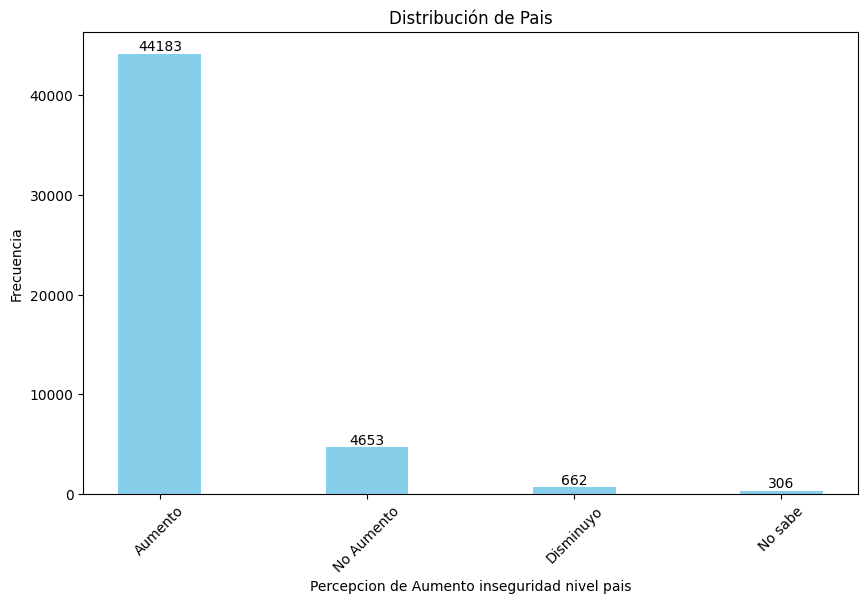

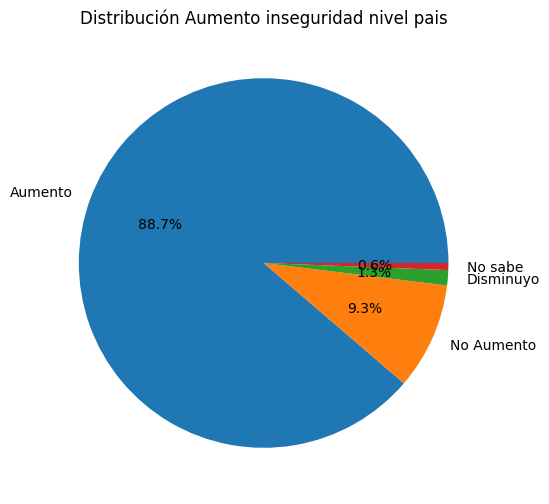

In [47]:
df_pais = df_enusc["P_AUMENTO_PAIS"].fillna(99) # creamos una copia de df enusc y
                                                # se llenan los valores nulos con el codigo 99 (No responde)
pais_count = df_pais.value_counts().sort_index()
display(pais_count)

# Graficos excluye "No responde"
etiquetas = ['Aumento', 'No Aumento', 'Disminuyo', 'No sabe', 'No responde']
title = 'Distribución de Pais'
xlabel = 'Percepcion de Aumento inseguridad nivel pais'
ylabel = 'Frecuencia'
print("Grafico de barras y torta correspondiente a la Percepcion del Aumento de inseguridad en Chile")
bar_plot(pais_count.values[:4], etiquetas[:4], title, xlabel, ylabel) 

plt.figure(figsize=(10, 6))
#plt.pie(pais_count.values[:4], labels=etiquetas[:4])
plt.pie(
    pais_count.values[:4],        
    labels=etiquetas[:4],         
    autopct='%1.1f%%'             # porcentaje con 1 decimal
)
plt.title('Distribución Aumento inseguridad nivel pais')
plt.show()

#### Percepcion de Aumento inseguridad nivel region: `BioBio`

Grafico de barras y torta correspondiente a la Percepcion de Aumento de inseguridad en la region del Biobio


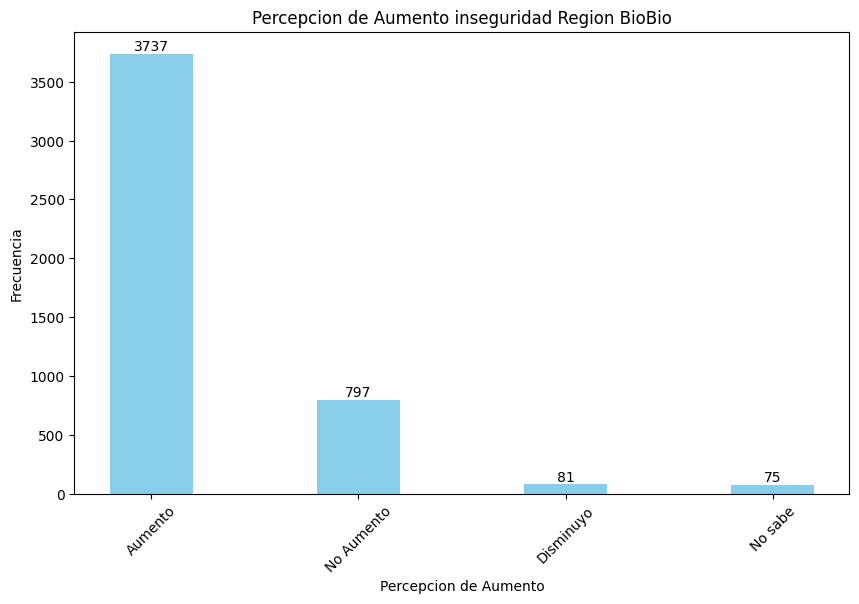

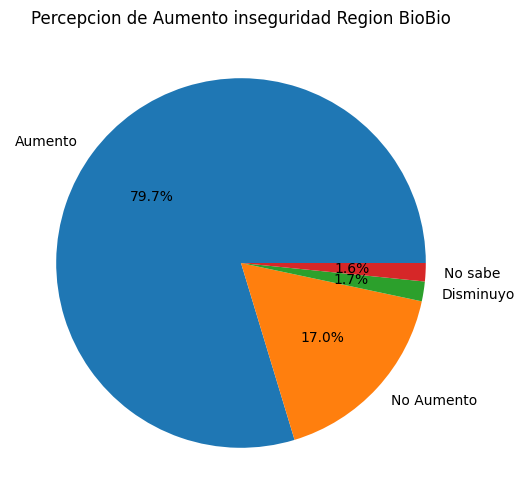

In [48]:
# Seleccion de region BioBio y limpieza de datos 
region_nombre = df_enusc.loc[df_enusc["enc_region"] == 8, "P_AUMENTO_COM"]
region_nombre.fillna(99, inplace=True)
region_count = region_nombre.value_counts().sort_index()


# Graficos excluye "No responde"
etiquetas = ["Aumento", "No Aumento", "Disminuyo", "No sabe", "No responde"]
titulo = 'Percepcion de Aumento inseguridad Region BioBio'
etiqueta_x = 'Percepcion de Aumento'
etiqueta_y = 'Frecuencia'
print("Grafico de barras y torta correspondiente a la Percepcion de Aumento de inseguridad en la region del Biobio")
biobio = bar_plot(region_count.values[:4], etiquetas[:4], titulo, etiqueta_x, etiqueta_y)

plt.figure(figsize=(10, 6))
#plt.pie(region_count.values[:4], labels=etiquetas[:4])
plt.pie(
    region_count.values[:4],        
    labels=etiquetas[:4],         
    autopct='%1.1f%%'             # porcentaje con 1 decimal
)
plt.title('Percepcion de Aumento inseguridad Region BioBio')
plt.show()



*Funcion para generalizar las graficas de la percepcion de inseguridad por region*

In [49]:
def graficar_percepcion_region(df, codigo_region, variable='P_AUMENTO_COM', nombre_region=""):
    # Filtrar región
    region = df.loc[df["enc_region"] == codigo_region, variable].copy()
    region.fillna(99, inplace=True)
    
    # Contar y ordenar
    conteo = region.value_counts().sort_index()
    
    etiquetas = ["Aumento", "No Aumento", "Disminuyó", "No sabe", "No responde"]
    titulo = f"Percepción de Aumento de Inseguridad en la región del {nombre_region}"
    etiqueta_x = "Percepción"
    etiqueta_y = "Frecuencia"

    # Gráfico de barras
    print(f"\nGráfico de barras y torta para la Región del {nombre_region}")
    bar_plot(conteo.values[:4], etiquetas[:4], titulo, etiqueta_x, etiqueta_y)

    # Gráfico de torta
    plt.figure(figsize=(10, 6))
    plt.pie(conteo.values[:4], labels=etiquetas[:4], autopct='%1.1f%%')
    plt.title(titulo)
    plt.show()

*Region de O'Higgins*


Gráfico de barras y torta para la Región del O'Higgins


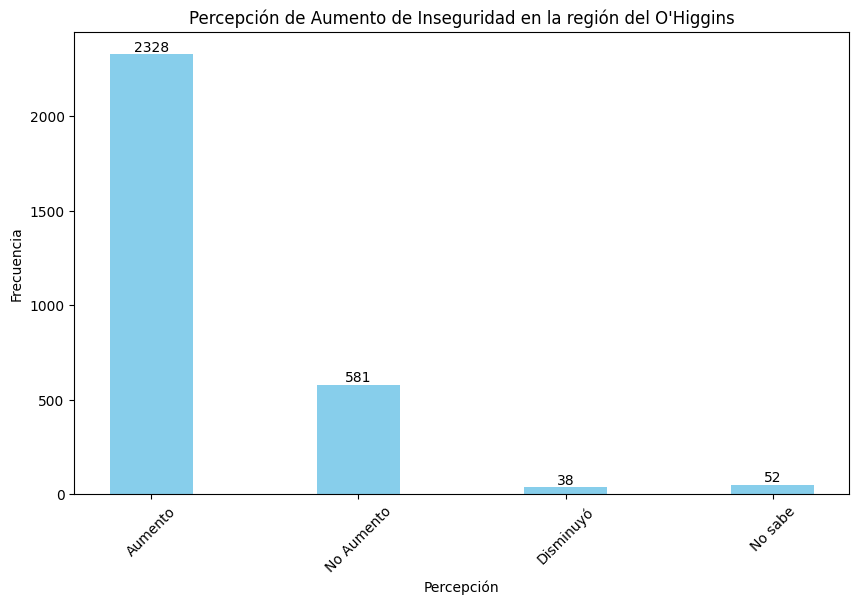

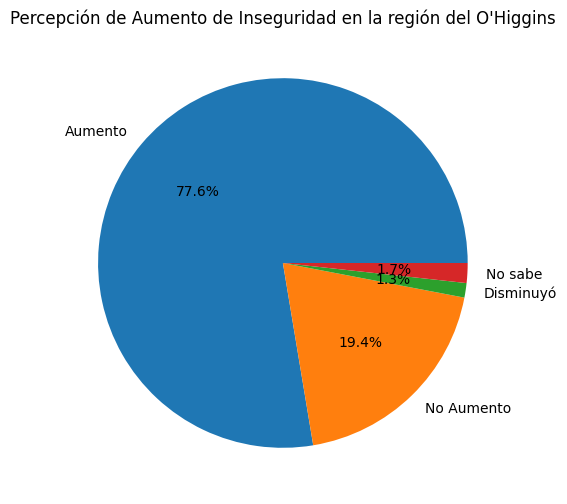

In [50]:
graficar_percepcion_region(df_enusc, 6, variable="P_AUMENTO_COM", nombre_region="O'Higgins")

*Region del Maule*


Gráfico de barras y torta para la Región del O'Higgins


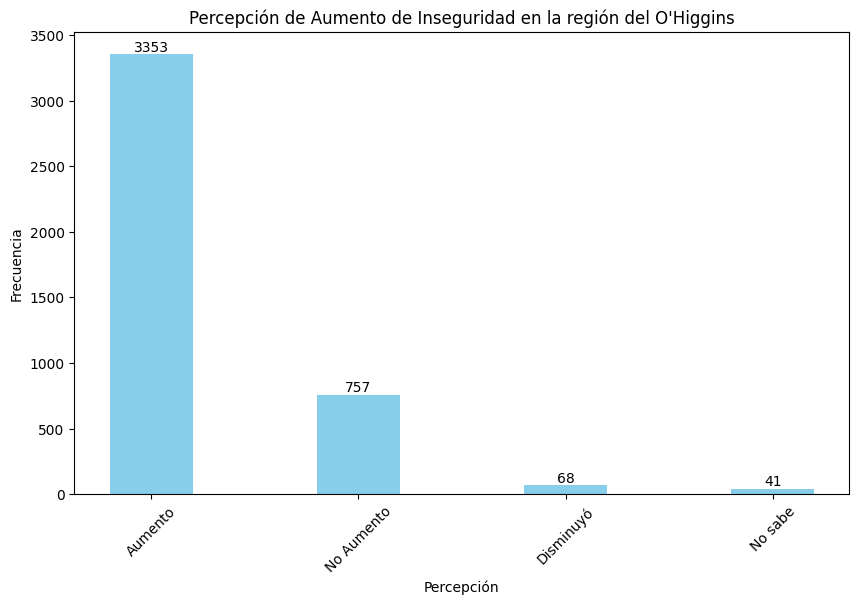

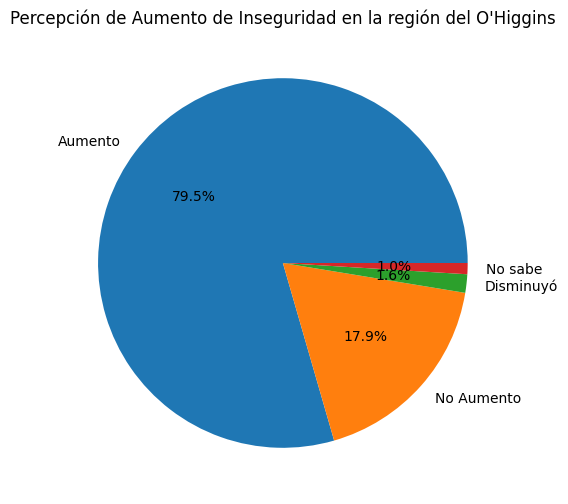

In [51]:
graficar_percepcion_region(df_enusc, 7, variable="P_AUMENTO_COM", nombre_region="O'Higgins")

*Comparativa Regional*

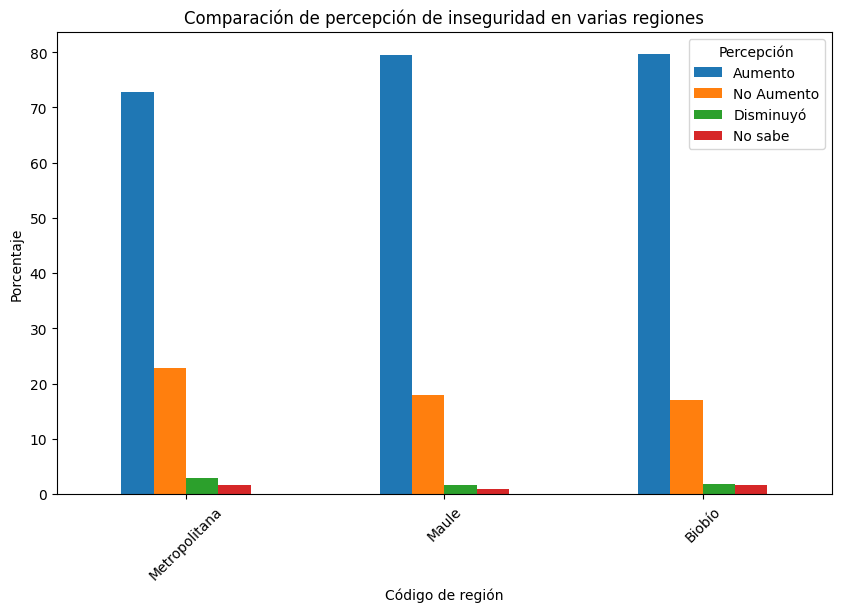

In [52]:
# Regiones a comparar
regiones = [13,7,8]  # O'higgins(metropolitana), Maule, BioBio

# Crear tabla de percepción para cada región
tabla_regiones = pd.DataFrame()
for r in regiones:
    valores = df_enusc.loc[df_enusc["enc_region"] == r, "P_AUMENTO_COM"]
    valores = valores.replace([99], pd.NA)
    conteo = valores.value_counts(normalize=True) * 100
    tabla_regiones[r] = conteo

tabla_regiones = tabla_regiones.T

reg_labels = {
    1: "Tarapacá",
    2: "Antofagasta",
    3: "Atacama",
    4: "Coquimbo",
    5: "Valparaíso",
    6: "O'Higgins",
    7: "Maule",
    8: "Biobío",
    9: "La Araucanía",
    10: "Los Lagos",
    11: "Aysén",
    12: "Magallanes",
    13: "Metropolitana",
    14: "Los Ríos",
    15: "Arica y Parinacota",
    16: "Ñuble"
}
# Convert index to series, apply mapping, and set back as index
tabla_regiones.index = tabla_regiones.index.map(reg_labels)
tabla_regiones.columns = ["Aumento", "No Aumento", "Disminuyó","No sabe"]

tabla_regiones.plot(kind='bar', figsize=(10, 6))
plt.title("Comparación de percepción de inseguridad en varias regiones")
plt.xlabel("Código de región")
plt.xticks(rotation=45)
plt.ylabel("Porcentaje")
plt.legend(title="Percepción")
plt.show()

*Percepcion de inseguridad general de todas las regiones*

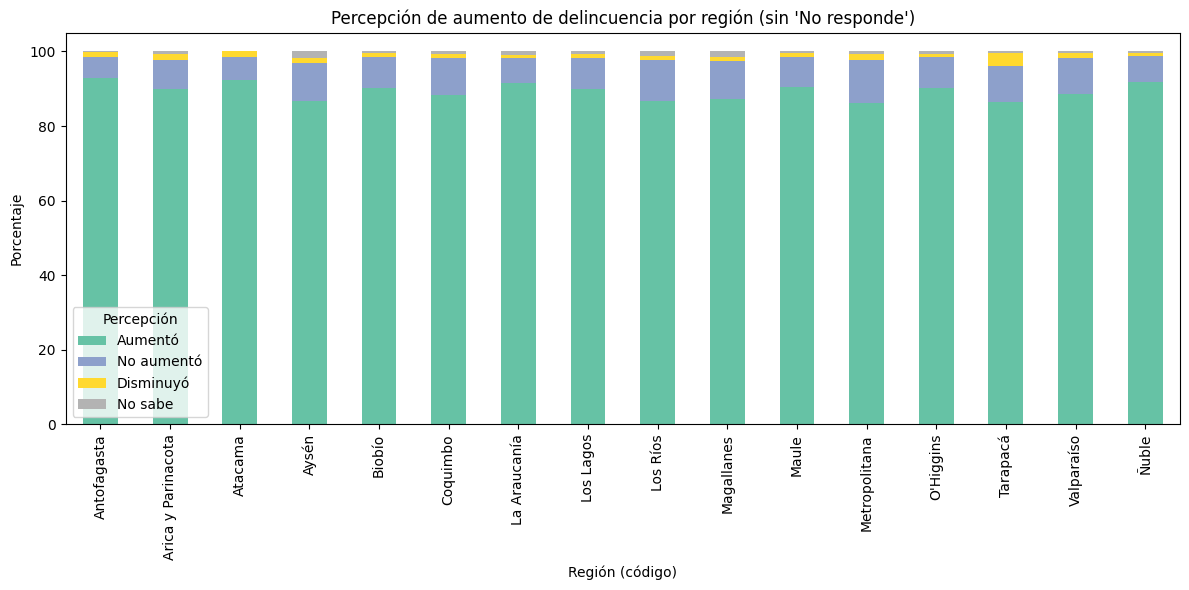

In [53]:
df_regiones = df_enusc[["enc_region", "P_AUMENTO_PAIS"]].copy()

# rellenamos valores nulos con 99 (No responde)
df_regiones["P_AUMENTO_PAIS"] = df_regiones["P_AUMENTO_PAIS"].fillna(99)

df_region_grafico = df_regiones[df_regiones["P_AUMENTO_PAIS"] != 99].copy()

# Reemplazar códigos por etiquetas legibles
etiquetas_percepcion = {
    1: "Aumentó",
    2: "No aumentó",
    3: "Disminuyó",
    88: "No sabe"
}
df_region_grafico["P_AUMENTO_PAIS"] = df_region_grafico["P_AUMENTO_PAIS"].replace(etiquetas_percepcion)

# Renombrar los valores de la columna "P_INSEG_DIA_1" con su etiqueta correspondiente
reg_labels = {
    1: "Tarapacá",
    2: "Antofagasta",
    3: "Atacama",
    4: "Coquimbo",
    5: "Valparaíso",
    6: "O'Higgins",
    7: "Maule",
    8: "Biobío",
    9: "La Araucanía",
    10: "Los Lagos",
    11: "Aysén",
    12: "Magallanes",
    13: "Metropolitana",
    14: "Los Ríos",
    15: "Arica y Parinacota",
    16: "Ñuble"
}
df_region_grafico["enc_region"] = df_region_grafico["enc_region"].replace(reg_labels)

# Crear tabla cruzada de porcentajes por región
tabla_region = pd.crosstab(
    df_region_grafico["enc_region"],
    df_region_grafico["P_AUMENTO_PAIS"],
    normalize='index'
) * 100

# Asegurar orden de columnas (rellenar con 0 si falta alguna categoría)
columnas_orden = ["Aumentó", "No aumentó", "Disminuyó", "No sabe"]
for col in columnas_orden:
    if col not in tabla_region.columns:
        tabla_region[col] = 0
tabla_region = tabla_region[columnas_orden]

# Gráfico de barras apiladas por región
tabla_region.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")
plt.title("Percepción de aumento de delincuencia por región (sin 'No responde')")
plt.xlabel("Región (código)")
plt.ylabel("Porcentaje")
plt.legend(title="Percepción")
plt.tight_layout()
plt.show()

#### Percepcion de Aumento inseguridad nivel comuna: `Concepcion`

Grafico de barras y torta correspondiente a la Percepcion del Aumento de inseguridad en la comuna de Concepcion


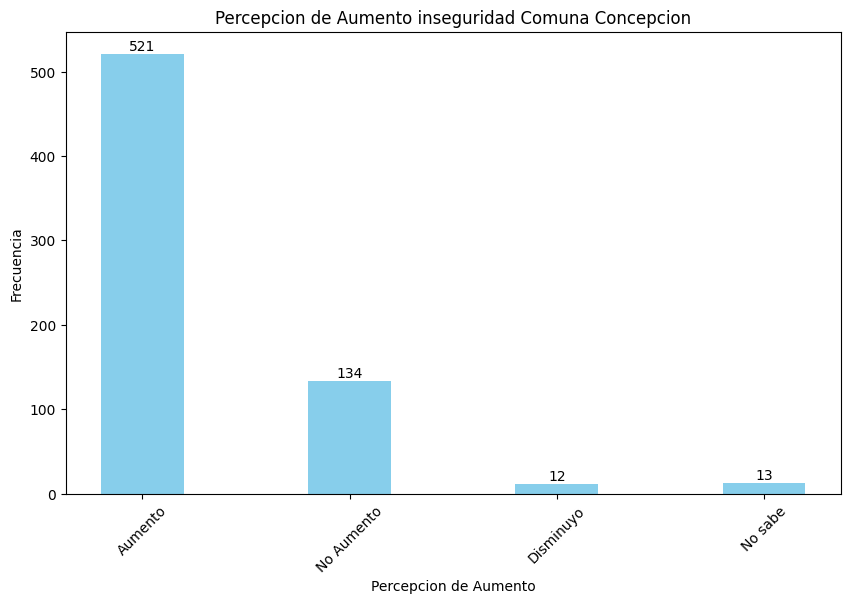

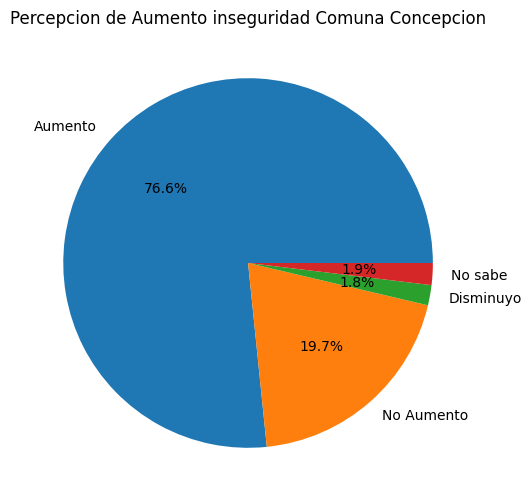

In [54]:
# 
comuna_nombre = df_enusc.loc[df_enusc["enc_rpc"] == 8101, "P_AUMENTO_COM"]
comuna_nombre.fillna(99, inplace=True)
comuna_count = comuna_nombre.value_counts().sort_index()

# Graficos excluye "No responde"
etiquetas = ["Aumento", "No Aumento", "Disminuyo", "No sabe", "No responde"]
titulo = 'Percepcion de Aumento inseguridad Comuna Concepcion'
etiqueta_x = 'Percepcion de Aumento'
etiqueta_y = 'Frecuencia'
bar_plot(comuna_count.values[:4], etiquetas[:4], titulo, etiqueta_x, etiqueta_y)
print("Grafico de barras y torta correspondiente a la Percepcion del Aumento de inseguridad en la comuna de Concepcion")
plt.figure(figsize=(10, 6))
#plt.pie(comuna_count.values[:4], labels=etiquetas[:4])
plt.pie(
    comuna_count.values[:4],        
    labels=etiquetas[:4],         
    autopct='%1.1f%%'             # porcentaje con 1 decimal
)
plt.title('Percepcion de Aumento inseguridad Comuna Concepcion')
plt.show()



#### *Percepcion del aumento de inseguridad con respecto a la edad*

In [55]:
df_pais = df_enusc[["rph_edad", "P_INSEG_DIA_1"]].copy()
# Eliminar filas con valores no deseados
df_pais = df_pais[df_pais["P_INSEG_DIA_1"].isin([1, 2, 3, 4])]

# Renombrar los valores de la columna "rph_edad" con su etiqueta correspondiente
labels = {
    0: "0 a 14 años",
    1: "15 a 19 años",
    2: "20 a 29 años",
    3: "30 a 39 años",
    4: "40 a 49 años",
    5: "50 a 59 años",
    6: "60 a 69 años",
    7: "70 años o más"
}
df_pais["rph_edad"] = df_pais["rph_edad"].replace(labels)

# Renombrar los valores de la columna "P_INSEG_DIA_1" con su etiqueta correspondiente
inseg_labels = {
    1: "Muy inseguro/a",
    2: "Inseguro/a",
    3: "Seguro/a",
    4: "Muy seguro/a"
}
df_pais["P_INSEG_DIA_1"] = df_pais["P_INSEG_DIA_1"].replace(inseg_labels)

print(df_pais)


# Crear tabla de frecuencias cruzadas normalizada por filas (porcentaje)
tabla = pd.crosstab(df_pais["rph_edad"], df_pais["P_INSEG_DIA_1"], normalize='index') * 100

# Ordenar categorias si es necesario
orden_columnas = ["Muy inseguro/a", "Inseguro/a", "Seguro/a", "Muy seguro/a"]
tabla = tabla[orden_columnas]



             rph_edad P_INSEG_DIA_1
0        50 a 59 años      Seguro/a
5        40 a 49 años      Seguro/a
8        60 a 69 años      Seguro/a
10      70 años o más      Seguro/a
12       60 a 69 años      Seguro/a
...               ...           ...
146280   60 a 69 años      Seguro/a
146283   20 a 29 años    Inseguro/a
146285   20 a 29 años      Seguro/a
146290   20 a 29 años      Seguro/a
146291   50 a 59 años    Inseguro/a

[48826 rows x 2 columns]


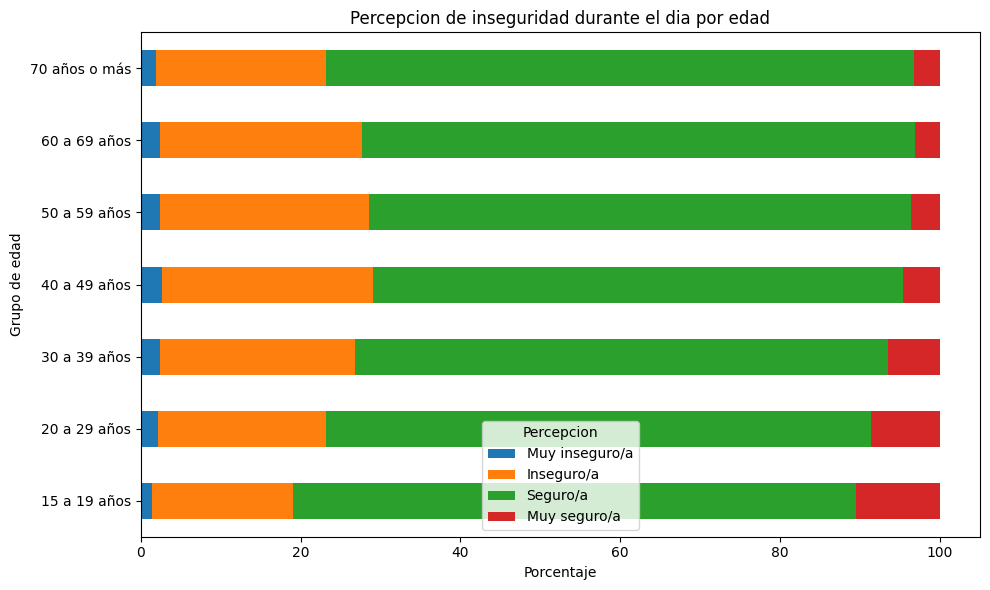

In [56]:
# Grafico de barras apiladas horizontales
tabla.plot(kind='barh', stacked=True, figsize=(10, 6))

plt.xlabel("Porcentaje")
plt.ylabel("Grupo de edad")
plt.title("Percepcion de inseguridad durante el dia por edad")
plt.legend(title="Percepcion")
plt.tight_layout()
plt.show()


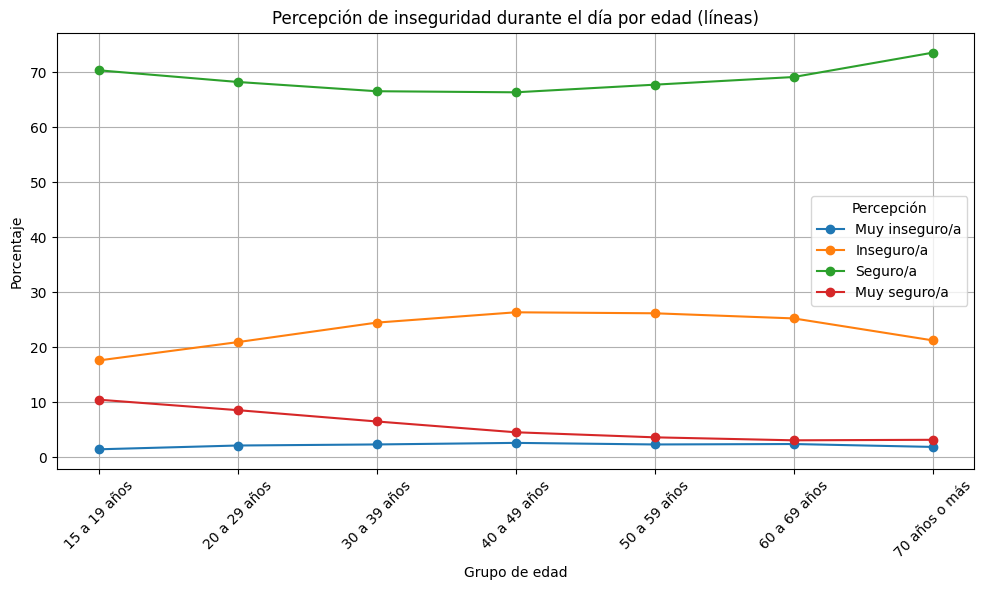

In [57]:
#Grafico de lineas multiples
plt.figure(figsize=(10, 6))
for col in tabla.columns:
    plt.plot(tabla.index, tabla[col], marker='o', label=col)

plt.title("Percepción de inseguridad durante el día por edad (líneas)")
plt.xlabel("Grupo de edad")
plt.ylabel("Porcentaje")
plt.xticks(rotation=45)
plt.legend(title="Percepción")
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5) Categoria: Hackeo de correo o redes sociales (HACK)

*Cantidad de delitos a nivel pais*

HACK
0.0    47981
1.0     1832
Name: count, dtype: int64


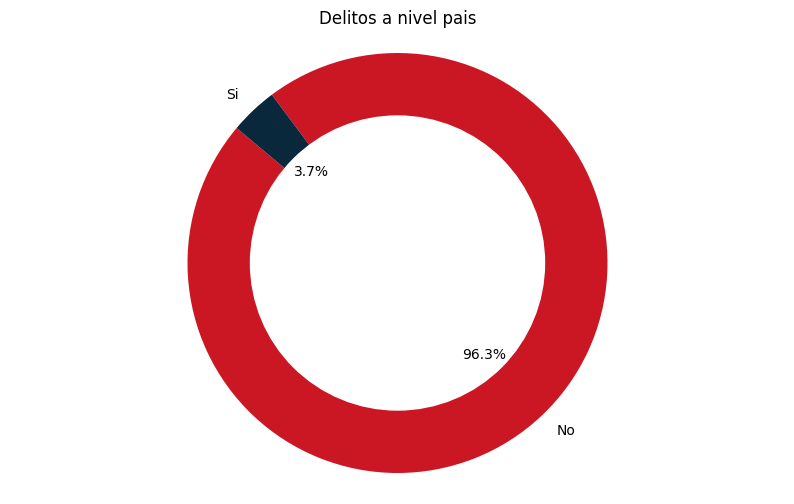

In [58]:
# Cantidad de delitos a nivel pais
# Usamos variable HACK que filtra si el delito fue cometido o no
total_hack_pais = df_enusc["HACK"].value_counts().sort_index()
# print(df_enusc["HACK"].isna().sum())
print(total_hack_pais)

labels = ["No", "Si"]
title = 'Delitos a nivel pais' 

# crear grafico de torta
plt.figure(figsize=(10, 6))
plt.pie(total_hack_pais.values, labels=labels, autopct='%1.1f%%', colors={"#09283CFF", "#CB1724FF"}, startangle=140)
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.axis('equal')
plt.title(title)
plt.show()

*Creacion DataFrame HACK*



In [67]:
# Limpieza de datos
# Se eliminan las columnas que no son necesarias para el analisis

# Llamada de angos de columnas a estudiar
hack_columns = df_enusc.columns[df_enusc.columns.get_loc("SCREEN_ROB_HACK"):df_enusc.columns.get_loc("HACK_PERSONAL_N")+1]
hack_descr = df_enusc.columns[df_enusc.columns.get_loc("HACK_QUIEN__0"):df_enusc.columns.get_loc("HACK_MOTIV_NO_DEN")+1]

# Concatenar columnas a estudiar
selected_columns = ["rph_edad"] + hack_columns.tolist() + hack_descr.tolist()

# Filtrar el dataframe para obtener solo las filas donde HACK == 1, indicador que que el delito fue cometido
# Agregando las columnas seleccionadas previamente
df_hack = df_enusc.loc[df_enusc["HACK"] == 1, selected_columns]

remove_columns = ["HACK_QUIEN__1", "HACK_QUIEN__2", "HACK_QUIEN__3", "HACK_QUIEN__4", "HACK_QUIEN__5"]
df_hack.drop(columns=remove_columns, inplace=True)
# Renombrar los valores de la columna "rph_edad" con su etiqueta correspondiente
labels = {
    0: "0 a 14 años",
    1: "15 a 19 años",
    2: "20 a 29 años",
    3: "30 a 39 años",
    4: "40 a 49 años",
    5: "50 a 59 años",
    6: "60 a 69 años",
    7: "70 años o más"
}
df_hack["rph_edad"] = df_hack["rph_edad"].replace(labels)

# se hace una limpieza de valores nulos, dependiendo de su descripcion
df_hack.fillna({"HACK_DENUNCIAS_N": 0,
                "HACK_PERSONAL_N": 0,
                "HACK_VALOR_H": 99,
                "HACK_DENUNCIA_COMO": 99,
                "HACK_SATISF_DEN": 99,
                "HACK_ACCION_POLICIAL": 99,
                "HACK_CONTACTO_MP": 99,
                "HACK_CONT_MP_MOT__1": 0,
                "HACK_CONT_MP_MOT__2": 0,
                "HACK_CONT_MP_MOT__3": 0,
                "HACK_CONT_MP_MOT__4": 0,
                "HACK_CONT_MP_MOT__5": 0,
                "HACK_CONT_MP_MOT__88": 0,
                "HACK_CONT_MP_MOT__99": 0,
                "HACK_MOTIV_NO_DEN": 99
                }, inplace=True)

# print(df_hack.isna().sum())

### Identificacion del delito

Basado en la seccion `1.6.1. Identificación de delitos`

SCREEN_ROB_HACK_N
1      1459
2       226
3        83
4        27
5        13
6         4
7         5
8         2
10        7
11        1
15        1
20        2
70        1
100       1
Name: count, dtype: int64


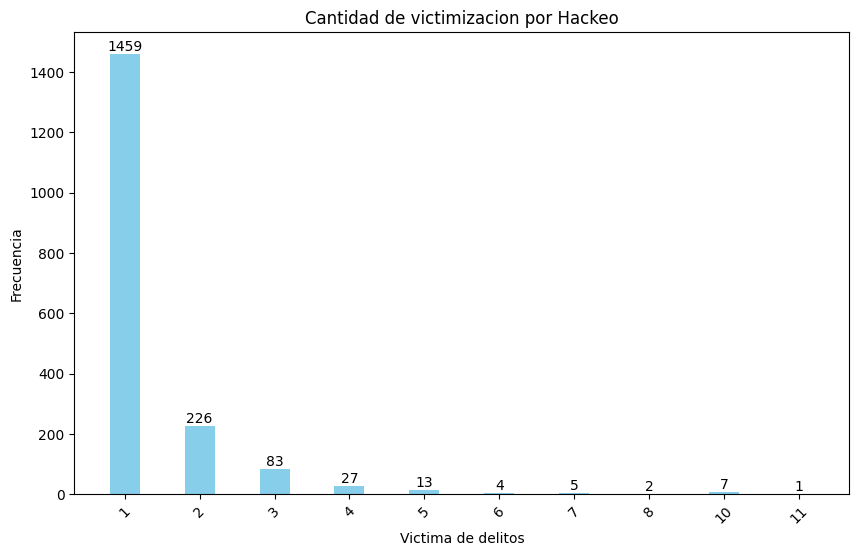

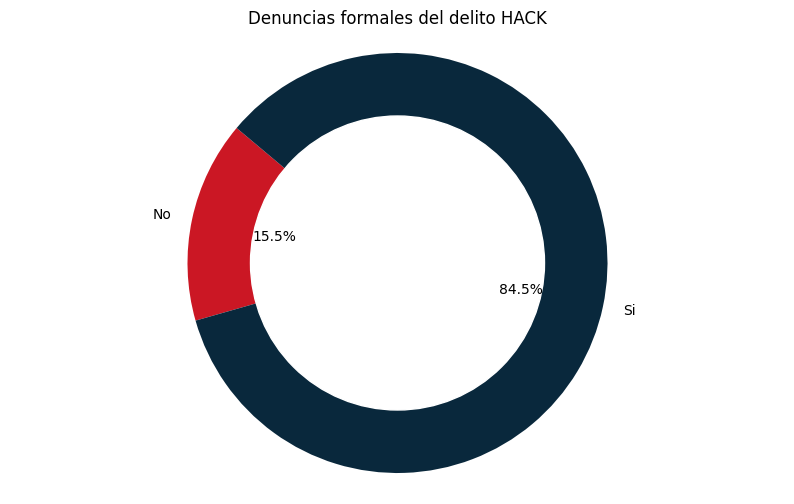

In [68]:
# Frecuencia de victimizacion por hackeo
count_delitos_hack = (df_hack["SCREEN_ROB_HACK_N"].astype(int)).value_counts().sort_index()
print(count_delitos_hack)

titulo = 'Cantidad de victimizacion por Hackeo'
etiqueta_x = 'Victima de delitos'
etiqueta_y = 'Frecuencia'

bar_plot(count_delitos_hack[:10], count_delitos_hack.index[:10], titulo, etiqueta_x, etiqueta_y)

# Porcentaje de denuncias formales del delito
count_denuncias = df_hack["HACK_DENUNCIAS"].value_counts().sort_index()

# Crear grafico de torta
labels = ["No", "Si"]
title = 'Denuncias formales del delito HACK'

plt.figure(figsize=(10, 6))
plt.pie(count_denuncias.values[:2], labels=labels, autopct='%1.1f%%', colors={"#09283CFF", "#CB1724FF"}, startangle=140)
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')
plt.title(title)
plt.show()

### Caracterizacion del delito

Basado en `1.6.2.15. Caracterización: hackeo de correo o redes sociales`

In [61]:
display(df_hack)

,SCREEN_ROB_HACK,SCREEN_ROB_HACK_N,HACK_DENUNCIAS,HACK_DENUNCIAS_N,HACK_PERSONAL,HACK_PERSONAL_N,HACK_QUIEN__0,HACK_MES,HACK_CUENTA,HACK_TIEMPO_RES,...,HACK_ACCION_POLICIAL,HACK_CONTACTO_MP,HACK_CONT_MP_MOT__1,HACK_CONT_MP_MOT__2,HACK_CONT_MP_MOT__3,HACK_CONT_MP_MOT__4,HACK_CONT_MP_MOT__5,HACK_CONT_MP_MOT__88,HACK_CONT_MP_MOT__99,HACK_MOTIV_NO_DEN
380,1.0,1.0,1.0,1.0,1.0,1.0,3.0,14.0,1.0,8.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0
408,1.0,3.0,1.0,3.0,1.0,3.0,2.0,10.0,1.0,1.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0
436,1.0,3.0,2.0,0.0,1.0,3.0,3.0,2.0,1.0,6.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
526,1.0,1.0,2.0,0.0,1.0,1.0,1.0,14.0,1.0,2.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
575,1.0,1.0,2.0,0.0,1.0,1.0,1.0,8.0,1.0,1.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146179,1.0,1.0,1.0,1.0,2.0,0.0,2.0,10.0,1.0,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0
146194,1.0,1.0,2.0,0.0,2.0,0.0,4.0,7.0,1.0,5.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
146207,1.0,2.0,2.0,0.0,2.0,0.0,2.0,10.0,1.0,1.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
146280,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16.0,1.0,1.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0


### Cantidad de denuncias por edad

HACK_DENUNCIA,1.0,2.0
rph_edad,,
15 a 19 años,11.695906,88.304094
20 a 29 años,15.789474,84.210526
30 a 39 años,13.636364,86.363636
40 a 49 años,16.477273,83.522727
50 a 59 años,16.877637,83.122363
60 a 69 años,16.260163,83.739837
70 años o más,12.500000,87.500000


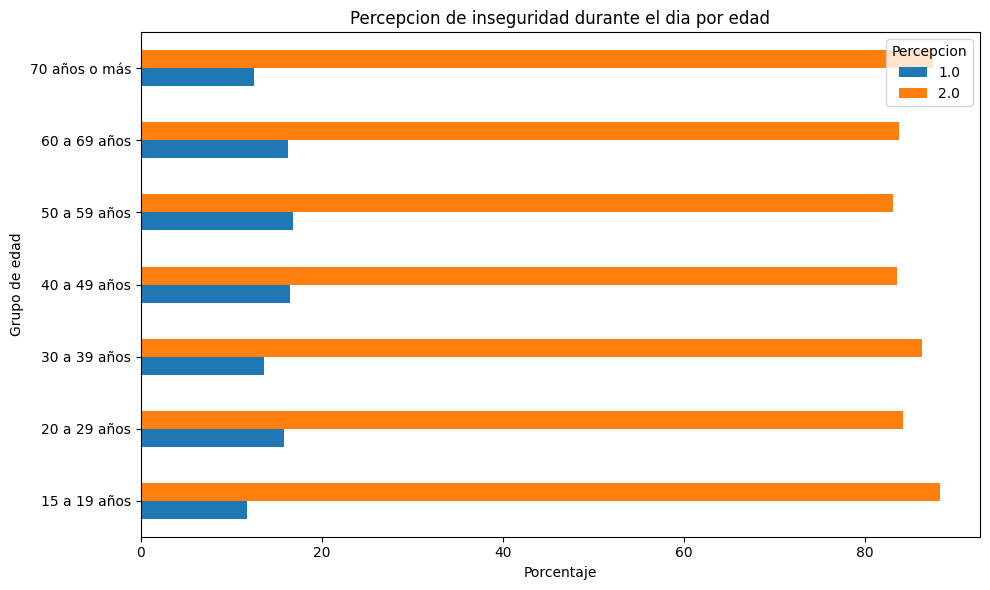

In [71]:
# Crear tabla de frecuencias cruzadas normalizada por filas (porcentaje)
tabla = pd.crosstab(df_hack["rph_edad"], df_hack.loc[df_hack["HACK_DENUNCIA"] != 88, "HACK_DENUNCIA"], normalize='index') * 100
display(tabla)

# Grafico de barras apiladas horizontales
plotted = tabla.plot(kind='barh', stacked=False, figsize=(10, 6))

plt.xlabel("Porcentaje")
plt.ylabel("Grupo de edad")
plt.title("Percepcion de inseguridad durante el dia por edad")
plt.legend(title="Percepcion")
plt.tight_layout()
plt.show()

### Nivel Socio Economico vs Percepcion aumento inseguridad `barrio`

NSE vs Percepcion de Aumento en el Barrio
Distribucion porcentual de Percepcion de Aumento (Barrio) por NSE:


P_AUMENTO_BARRIO,Aumento,Se mantuvo,Disminuyo
rph_nse,,,
NSE Alto,52.092177,41.570649,6.337174
NSE Bajo,50.684519,43.413122,5.902359
NSE Medio,52.655586,42.395009,4.949405


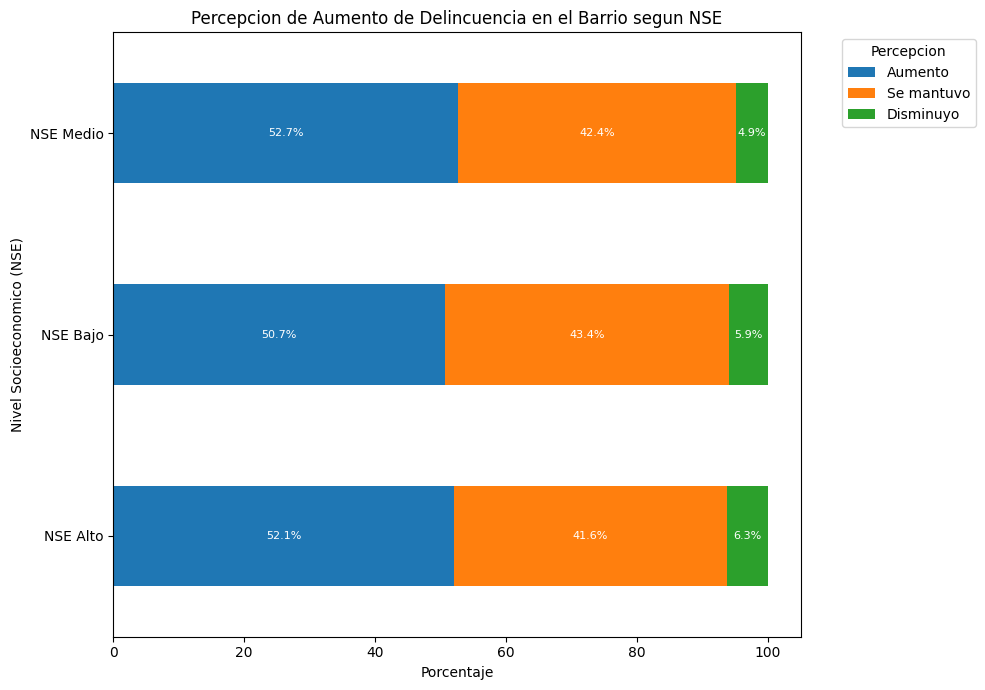

In [ ]:
# NSE vs Percepcion de Aumento en el Barrio
print("NSE vs Percepcion de Aumento en el Barrio")

# Seleccionar columnas relevantes y copiar
df_nse_percep = df_enusc[['rph_nse', 'P_AUMENTO_BARRIO']].copy()

# Eliminar filas donde P_AUMENTO_BARRIO y rph_nse no sean 1, 2 o 3 (excluye No sabe/No responde)
df_nse_percep = df_nse_percep[df_nse_percep['P_AUMENTO_BARRIO'].isin([1, 2, 3])]
df_nse_percep = df_nse_percep[df_nse_percep['rph_nse'].isin([1, 2, 3])]

# Renombrar valores numericos a etiquetas descriptivas
nse_labels = {
    1: "NSE Bajo",
    2: "NSE Medio",
    3: "NSE Alto"
}
df_nse_percep['rph_nse'] = df_nse_percep['rph_nse'].replace(nse_labels)

aumento_labels = {
    1: "Aumento",
    2: "Se mantuvo",
    3: "Disminuyo"
}
df_nse_percep['P_AUMENTO_BARRIO'] = df_nse_percep['P_AUMENTO_BARRIO'].replace(aumento_labels)

# Crear tabla de frecuencias cruzadas normalizada por filas (indice = NSE)
tabla_nse = pd.crosstab(df_nse_percep['rph_nse'], df_nse_percep['P_AUMENTO_BARRIO'], normalize='index') * 100

# Ordenar columnas para el grafico
orden_columnas_nse = ["Aumento", "Se mantuvo", "Disminuyo"]
tabla_nse = tabla_nse[orden_columnas_nse]

print("Distribucion porcentual de Percepcion de Aumento (Barrio) por NSE:")
display(tabla_nse)

# Grafico de barras apiladas horizontales
ax = tabla_nse.plot(kind='barh', stacked=True, figsize=(10, 7))

plt.xlabel("Porcentaje")
plt.ylabel("Nivel Socioeconomico (NSE)")
plt.title("Percepcion de Aumento de Delincuencia en el Barrio segun NSE")
plt.legend(title="Percepcion", bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda
plt.tight_layout()

# Etiquetas de porcentaje dentro de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='white', fontsize=8)

plt.show()

### Percepcion Barrio vs Dejar de Salir de Noche

Distribucion porcentual de Dejar de Salir de Noche segun Percepcion (Barrio):


P_MOD_ACTIVIDADES_8,Si dejo de salir,No dejo de salir
P_AUMENTO_BARRIO,,
Aumento,74.734043,25.265957
Se mantuvo,52.407496,47.592504
Disminuyo,43.586651,56.413349


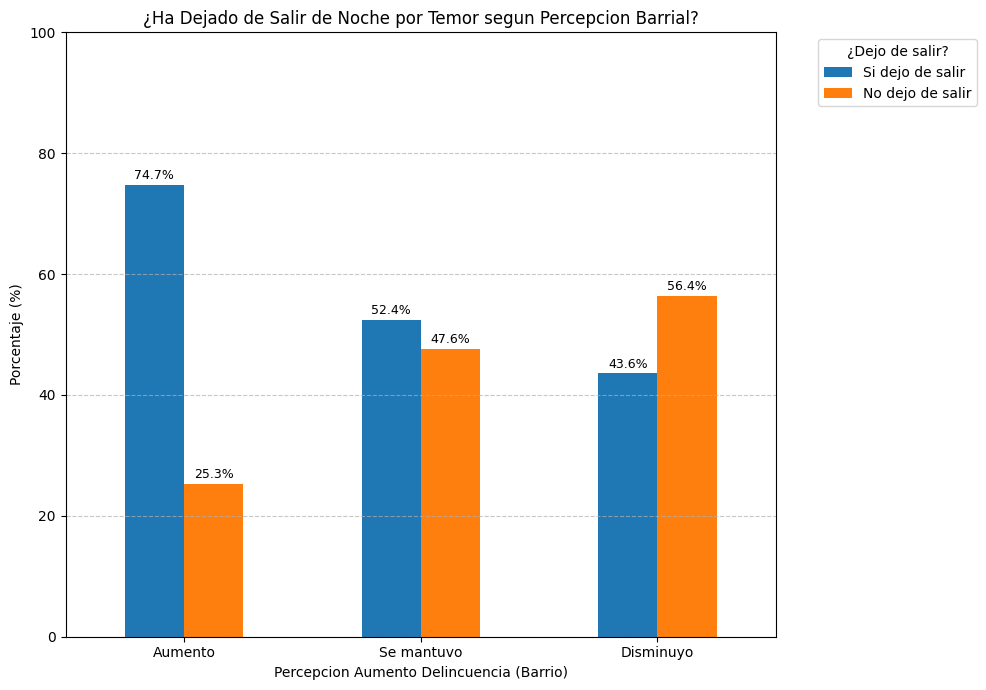

In [ ]:
# Seleccionar columnas relevantes y copiar
df_percep_salir = df_enusc[['P_AUMENTO_BARRIO', 'P_MOD_ACTIVIDADES_8']].copy()

# Filtrar respuestas validas
df_percep_salir = df_percep_salir[df_percep_salir['P_AUMENTO_BARRIO'].isin([1, 2, 3])]
df_percep_salir = df_percep_salir[df_percep_salir['P_MOD_ACTIVIDADES_8'].isin([1, 2])]

# Renombrar valores numericos a etiquetas
aumento_labels = {
    1: "Aumento",
    2: "Se mantuvo",
    3: "Disminuyo"
}
df_percep_salir['P_AUMENTO_BARRIO'] = df_percep_salir['P_AUMENTO_BARRIO'].replace(aumento_labels)

mod_actividad_labels = {
    1: "Si dejo de salir",
    2: "No dejo de salir"
}
df_percep_salir['P_MOD_ACTIVIDADES_8'] = df_percep_salir['P_MOD_ACTIVIDADES_8'].replace(mod_actividad_labels)

# Crear tabla de frecuencias cruzadas normalizada por filas (indice = Percepcion Barrio)
tabla_salir = pd.crosstab(df_percep_salir['P_AUMENTO_BARRIO'], df_percep_salir['P_MOD_ACTIVIDADES_8'], normalize='index') * 100

# Ordenar filas y columnas si es necesario
orden_filas_salir = ["Aumento", "Se mantuvo", "Disminuyo"]
orden_columnas_salir = ["Si dejo de salir", "No dejo de salir"]

# Usar .loc para asegurar el orden de filas y columnas
tabla_salir = tabla_salir.reindex(index=orden_filas_salir, columns=orden_columnas_salir, fill_value=0)


print("Distribucion porcentual de Dejar de Salir de Noche segun Percepcion (Barrio):")
display(tabla_salir) # Muestra la tabla con los porcentajes

# Grafico de Barras Agrupadas Verticales
ax = tabla_salir.plot(kind='bar', stacked=False, figsize=(10, 7), rot=0)

plt.xlabel("Percepcion Aumento Delincuencia (Barrio)")
plt.ylabel("Porcentaje (%)") # El eje Y es el porcentaje
plt.title("¿Ha Dejado de Salir de Noche por Temor segun Percepcion Barrial?")
plt.legend(title="¿Dejo de salir?", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100) # Limite eje Y 100%
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grilla horizontal

# Etiquetas de porcentaje sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2, fontsize=9)

plt.tight_layout() # Ajustar layout para que la leyenda no se solape
plt.show()

### Correlacion Victimizacion Hogar vs Percepcion de Aumento inseguridad (por Comuna)

Scatter Plot: Victimizacion Hogar vs Percepcion de Aumento (por Comuna)


enc_rpc
1101    45.432099
1107    49.270073
1401    28.723404
2101    27.205882
2201    37.417943
Name: Tasa Victimizacion Hogar (%), dtype: float64

enc_rpc
1101    79.378882
1107    86.605505
1401    76.756757
2101    90.159902
2201    92.997812
Name: Tasa Percibe Aumento (%), dtype: float64

Tasas combinadas por comuna (primeras filas):


,Tasa Victimizacion Hogar (%),Tasa Percibe Aumento (%)
enc_rpc,,
1101,45.432099,79.378882
1107,49.270073,86.605505
1401,28.723404,76.756757
2101,27.205882,90.159902
2201,37.417943,92.997812


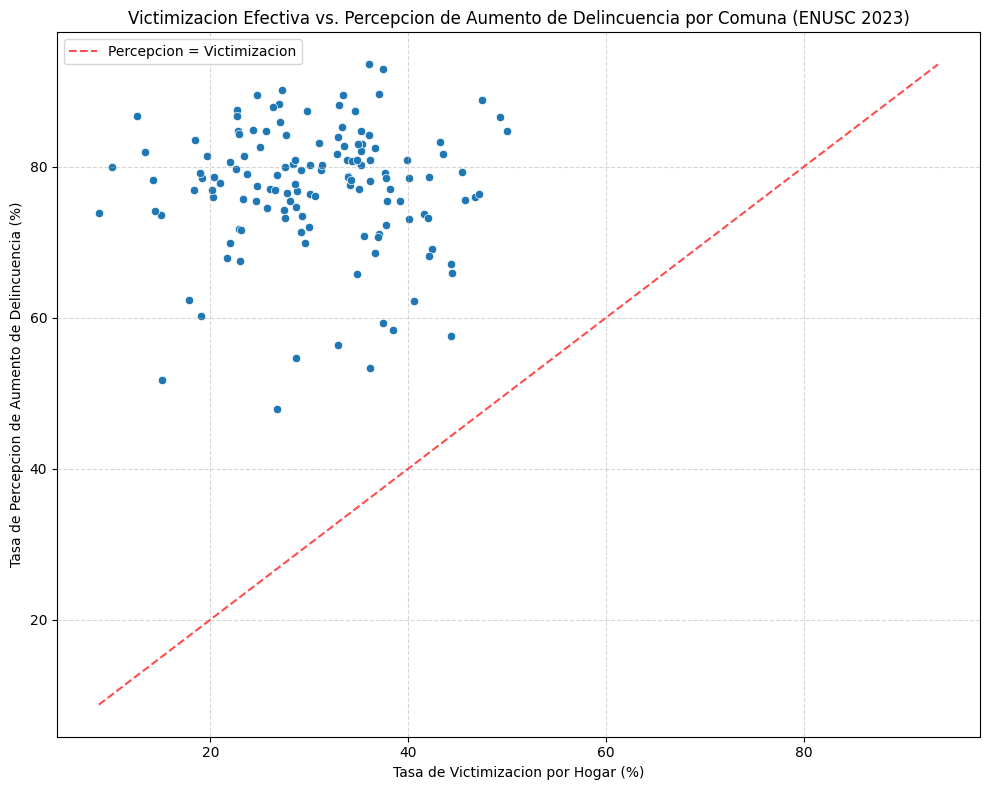

Coeficiente de correlacion de Pearson entre tasas comunales: -0.007


In [97]:
print("Scatter Plot: Victimizacion Hogar vs Percepcion de Aumento (por Comuna)")

# Columnas necesarias y eliminar NaN
cols_necesarias = ['enc_rpc', 'VH_DC', 'P_AUMENTO_COM']
df_scatter = df_enusc[cols_necesarias].dropna(subset=cols_necesarias).copy()

# VH_DC = 1 si el hogar fue victimizado, 0 si no. Calculado en proporcion
tasa_victimizacion_hogar = df_scatter.groupby('enc_rpc')['VH_DC'].mean() * 100
tasa_victimizacion_hogar = tasa_victimizacion_hogar.rename('Tasa Victimizacion Hogar (%)')
display(tasa_victimizacion_hogar.head())

# Tasa de Percepcion de Aumento por Comuna
# Filtrar solo respuestas validas para P_AUMENTO_COM
df_percep_com = df_scatter[df_scatter['P_AUMENTO_COM'].isin([1, 2, 3])].copy()

# Indicador Binario 1 si P_AUMENTO_COM es 1, 0 en otro caso
df_percep_com['Percibe_Aumento'] = (df_percep_com['P_AUMENTO_COM'] == 1).astype(int)

# Calcular la proporcion que percibe aumento por comuna
tasa_percepcion_aumento = df_percep_com.groupby('enc_rpc')['Percibe_Aumento'].mean() * 100
tasa_percepcion_aumento = tasa_percepcion_aumento.rename('Tasa Percibe Aumento (%)')
display(tasa_percepcion_aumento.head())

# Combinar las tasas en un solo DataFrame
df_comunal = pd.merge(tasa_victimizacion_hogar, tasa_percepcion_aumento, left_index=True, right_index=True)
print("Tasas combinadas por comuna (primeras filas):")
display(df_comunal.head())

# Crear el Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_comunal, x='Tasa Victimizacion Hogar (%)', y='Tasa Percibe Aumento (%)')

# Añadir una linea diagonal (y=x) para referencia visual
# Si un punto esta por encima, la percepcion es mayor que la victimizacion, si esta por debajo, es menor.
max_val = max(df_comunal['Tasa Victimizacion Hogar (%)'].max(), df_comunal['Tasa Percibe Aumento (%)'].max())
min_val = min(df_comunal['Tasa Victimizacion Hogar (%)'].min(), df_comunal['Tasa Percibe Aumento (%)'].min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', alpha=0.7, label='Percepcion = Victimizacion')

plt.title('Victimizacion Efectiva vs. Percepcion de Aumento de Delincuencia por Comuna (ENUSC 2023)')
plt.xlabel('Tasa de Victimizacion por Hogar (%)')
plt.ylabel('Tasa de Percepcion de Aumento de Delincuencia (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Calcular correlacion
correlacion = df_comunal['Tasa Victimizacion Hogar (%)'].corr(df_comunal['Tasa Percibe Aumento (%)'], method='pearson') 
print(f"Coeficiente de correlacion de Pearson entre tasas comunales: {correlacion:.3f}")